 AMAZON SALES DATA

1.What is the average rating for each product category?

Ans-

import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Load the dataset  
df = pd.read_csv('/content/amazon.csv')  

# Check data types  
print(df.dtypes)  

# Convert 'rating' to numeric, replacing invalid parsing with NaN  
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  

# Check for NaN values  
print("NaN values in 'rating':", df['rating'].isna().sum())  

# Optionally, drop NaN values if needed  
df = df.dropna(subset=['rating'])  

# Calculate average rating  
average_rating = df.groupby('category')['rating'].mean().reset_index()  
print(average_rating)



In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')

# Check data types
print(df.dtypes)

# Convert 'rating' to numeric, replacing invalid parsing with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check for NaN values
print("NaN values in 'rating':", df['rating'].isna().sum())

# Optionally, drop NaN values if needed
df = df.dropna(subset=['rating'])

# Calculate average rating
average_rating = df.groupby('category')['rating'].mean().reset_index()
print(average_rating)

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object
NaN values in 'rating': 1
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|Offic

2.What are the top rating_count products by category?

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')
top_rating_count = df.loc[df.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print(top_rating_count)

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

3.What is the distribution of discounted prices vs. actual prices?


Ans-

import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Load the dataset  
df = pd.read_csv('/content/amazon.csv')  

plt.figure(figsize=(10, 6))  

# Plot histograms for actual_price and discounted_price  
sns.histplot(df['discounted_price'], kde=True, bins=30, color='blue', label='Discounted Price', alpha=0.6)  
sns.histplot(df['actual_price'], kde=True, bins=30, color='orange', label='Actual Price', alpha=0.6)  

plt.title('Distribution of Discounted Prices vs. Actual Prices')  
plt.xlabel('Price')  
plt.ylabel('Frequency')  
plt.legend()  
plt.show()

Alternatively, we can use the melt function to transform the DataFrame into a long format

import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Load the dataset  
df = pd.read_csv('/content/amazon.csv')  

# Melt the DataFrame to create a long-form DataFrame  
melted_df = df.melt(value_vars=['discounted_price', 'actual_price'],   
                     var_name='Price Type',   
                     value_name='Price')  

plt.figure(figsize=(10, 6))  
sns.histplot(melted_df, x='Price', hue='Price Type', kde=True, bins=30, alpha=0.6)  

plt.title('Distribution of Discounted Prices vs. Actual Prices')  
plt.xlabel('Price')  
plt.ylabel('Frequency')  
plt.show()

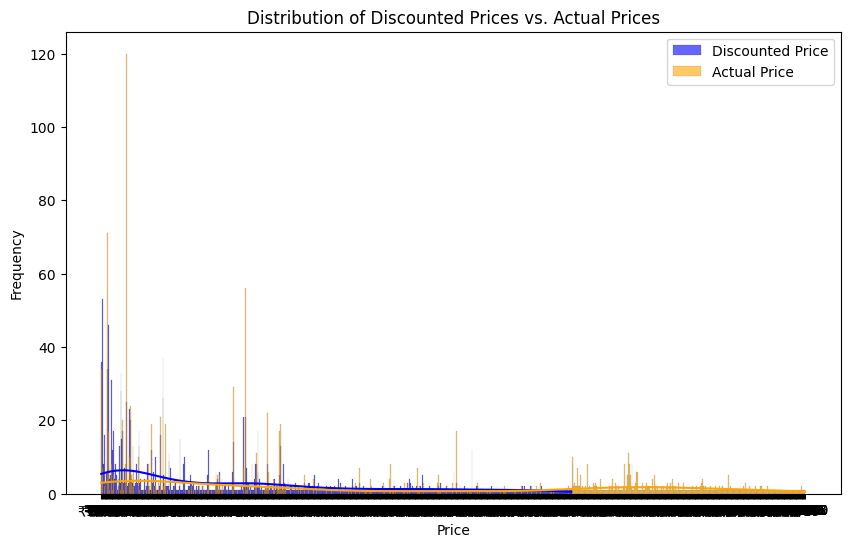

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')

plt.figure(figsize=(10, 6))

# Plot histograms for actual_price and discounted_price
sns.histplot(df['discounted_price'], kde=True, bins=30, color='blue', label='Discounted Price', alpha=0.6)
sns.histplot(df['actual_price'], kde=True, bins=30, color='orange', label='Actual Price', alpha=0.6)

plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

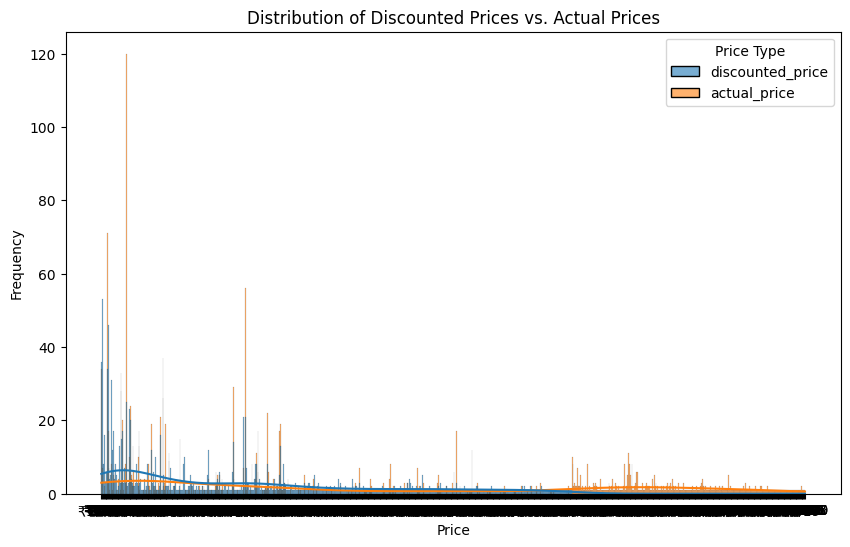

In [30]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')

# Melt the DataFrame to create a long-form DataFrame
melted_df = df.melt(value_vars=['discounted_price', 'actual_price'],
                     var_name='Price Type',
                     value_name='Price')

plt.figure(figsize=(10, 6))
sns.histplot(melted_df, x='Price', hue='Price Type', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

4.How does the average discount percentage vary across categories?

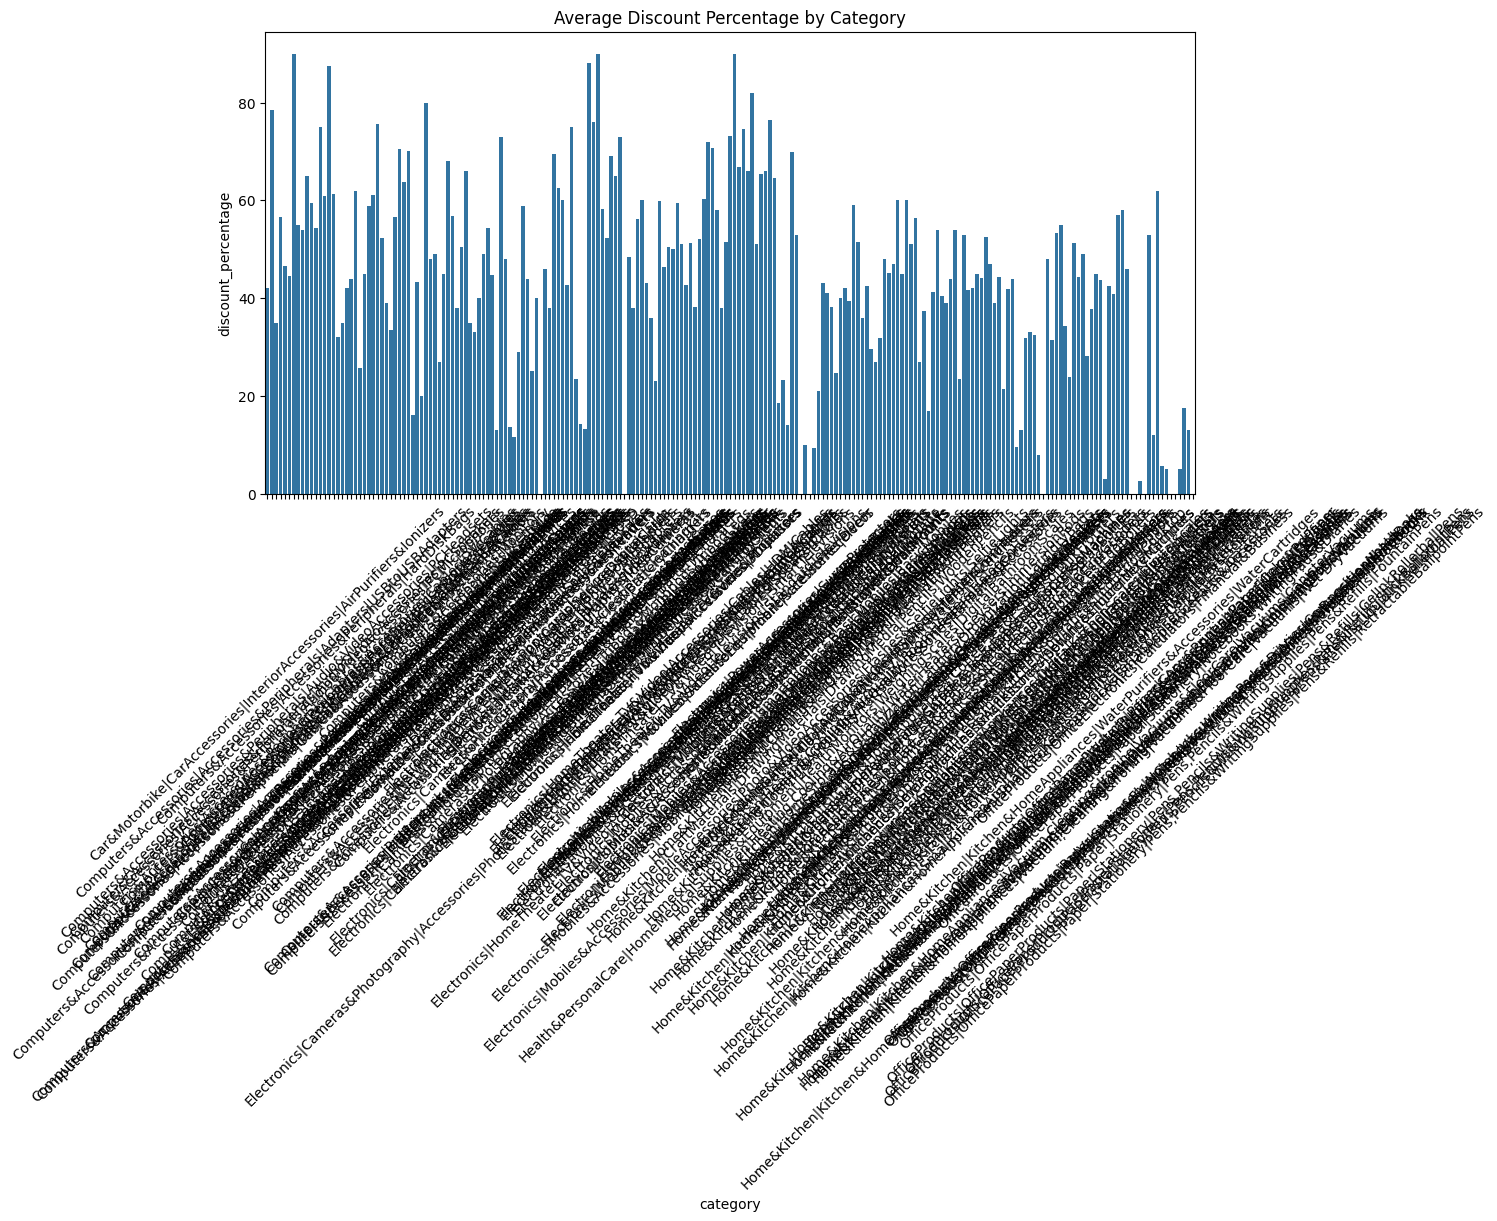

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')

# Clean the 'discount_percentage' column
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Now calculate the average discount percentage by category
average_discount = df.groupby('category')['discount_percentage'].mean().reset_index()

# Plotting the average discount percentage by category
plt.figure(figsize=(12, 6))
sns.barplot(data=average_discount, x='category', y='discount_percentage')
plt.title('Average Discount Percentage by Category')
plt.xticks(rotation=45)
plt.show()



5. What are the most popular product names?

In [4]:

import pandas as pd


df = pd.read_csv('/amazon.csv')
popular_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
print(popular_products)

                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


6. What are the most popular product keywords?

In [5]:
import pandas as pd


df = pd.read_csv('/amazon.csv')

from collections import Counter
import re

# Combine all product descriptions
all_descriptions = ' '.join(df['about_product'].fillna(''))
# Basic text processing
words = re.findall(r'\w+', all_descriptions.lower())
common_keywords = Counter(words).most_common(10)
print(common_keywords)

[('and', 5289), ('the', 4565), ('to', 3846), ('with', 3143), ('for', 2586), ('of', 2106), ('a', 2007), ('your', 1869), ('in', 1622), ('is', 1483)]


7. What are the most popular product reviews?

In [6]:
import pandas as pd


df = pd.read_csv('/amazon.csv')

popular_reviews = df[['review_title', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
print(popular_reviews)

                                           review_title rating_count
1279  Decent product,doesn't pick up sand,Ok ok,Must...          992
750   Nice .,very good batteries received,Longtevity...          989
977   A Quality Sound-Signature but leaves craving f...       98,250
1059  Kettle is good but bottle is not good quality,...          976
151   Great Cable, Charging Speeds Could Be Better,G...          974
32    Great Cable, Charging Speeds Could Be Better,G...          974
823   Great Cable, Charging Speeds Could Be Better,G...          974
536   Worth Every Square Inch.,VFM, Plastic build. M...       97,175
918   Worth Every Square Inch.,VFM, Plastic build. M...       97,174
1165  Good clips.,Second quality,Value for money.,No...           97


8. What is the correlation between discounted_price and rating?

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


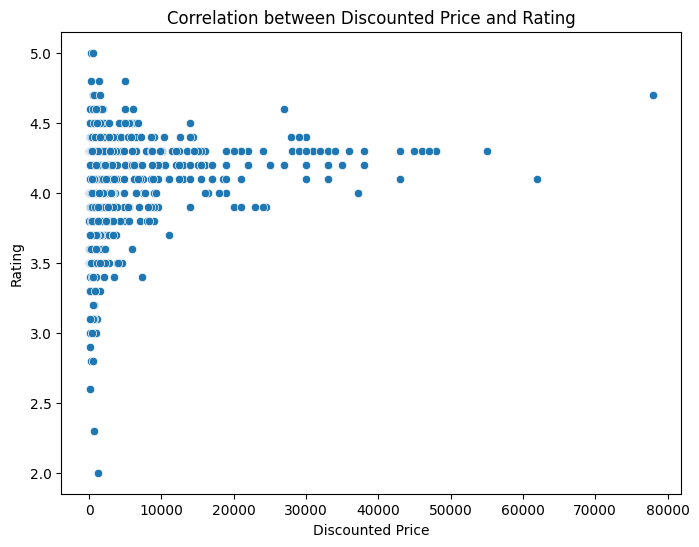

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')

# Remove the currency symbol and convert discounted_price to a float
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Ensure that the rating column is numeric. Replace any non-numeric values with NaN.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now calculate the correlation between discounted_price and rating
correlation = df[['discounted_price', 'rating']].corr()
print(correlation)

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

9.  What are the Top 5 categories based on the highest ratings ?

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/amazon.csv')

# Clean the 'rating' column by converting it to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now group by 'category' and get the top 5 categories with the highest average rating
top_categories = df.groupby('category')['rating'].mean().nlargest(5).reset_index()
print(top_categories)

                                            category  rating
0                      Computers&Accessories|Tablets     4.6
1            Computers&Accessories|Components|Memory     4.5
2  Computers&Accessories|NetworkingDevices|Networ...     4.5
3   Electronics|Cameras&Photography|Accessories|Film     4.5
4  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


10.  Identify any potential areas for improvement or optimization based on the data analysis.

Products with High Discounts but Low Ratings:
Empty DataFrame
Columns: [product_name, category, discount_percentage, rating]
Index: []

Products with Low Ratings but High Rating Counts:
Empty DataFrame
Columns: [product_name, rating, rating_count]
Index: []

Average Discounts by Category:
Empty DataFrame
Columns: [category, discount_percentage]
Index: []

Average Ratings by Category:
Empty DataFrame
Columns: [category, rating]
Index: []

Categories with Low Average Ratings and High Discounts:
Empty DataFrame
Columns: [category, avg_discount, avg_rating]
Index: []


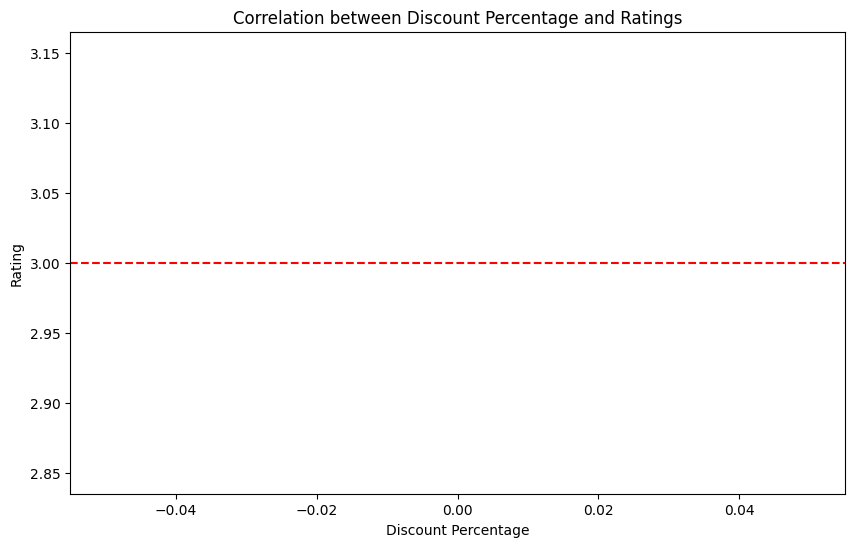


Summary of Insights:
Total items analyzed: 0
Products flagged for high discounts but low ratings: 0
Products flagged for low ratings but high rating counts: 0
Categories needing improvement based on average ratings and discounts: 0


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/amazon.csv')

# Data Cleaning (ensure prices and ratings are numeric)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop rows with NaN values in critical columns
df.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count'], inplace=True)

## Analysis for Improvement Areas

# 1. High Discounts but Low Ratings
high_discount_low_rating = df[(df['discount_percentage'] > 20) & (df['rating'] < 3)]
print("Products with High Discounts but Low Ratings:")
print(high_discount_low_rating[['product_name', 'category', 'discount_percentage', 'rating']])

# 2. Low Ratings but High Rating Counts
low_rating_high_sales = df[(df['rating'] < 3) & (df['rating_count'] > 100)]
print("\nProducts with Low Ratings but High Rating Counts:")
print(low_rating_high_sales[['product_name', 'rating', 'rating_count']])

# 3. Categories with Low Average Ratings and High Discounts
avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()
avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Check the results of the groupby operations
print("\nAverage Discounts by Category:")
print(avg_discount)
print("\nAverage Ratings by Category:")
print(avg_rating)

# Merge the two DataFrames on 'category'
category_analysis = pd.merge(avg_discount, avg_rating, on='category', suffixes=('_avg_discount', '_avg_rating'))

# Rename for clarity
category_analysis.rename(columns={'discount_percentage': 'avg_discount', 'rating': 'avg_rating'}, inplace=True)

# Filter categories that need attention
problematic_categories = category_analysis[category_analysis['avg_rating'] < 3]
print("\nCategories with Low Average Ratings and High Discounts:")
print(problematic_categories)

# 4. Correlation between Discounts and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount_percentage', y='rating', alpha=0.6)
plt.title('Correlation between Discount Percentage and Ratings')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.axhline(y=3, color='r', linestyle='--')  # Reference line for average rating
plt.show()

# 5. Summary Insights
print("\nSummary of Insights:")
print(f"Total items analyzed: {len(df)}")
print(f"Products flagged for high discounts but low ratings: {len(high_discount_low_rating)}")
print(f"Products flagged for low ratings but high rating counts: {len(low_rating_high_sales)}")
print(f"Categories needing improvement based on average ratings and discounts: {len(problematic_categories)}")

    Spotify Dataset

   

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

# Check for null values
print("Checking for null values in the dataset:")
print(df.isnull().sum())

# Handle null values as needed (e.g., fill or drop)
# Here, we drop rows with any null values
df.dropna(inplace=True)

# Check for duplicate rows
print("\nChecking for duplicate rows in the dataset:")
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
# Drop duplicate rows
df.drop_duplicates(inplace=True)

Checking for null values in the dataset:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows in the dataset:
Number of duplicate rows: 27


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

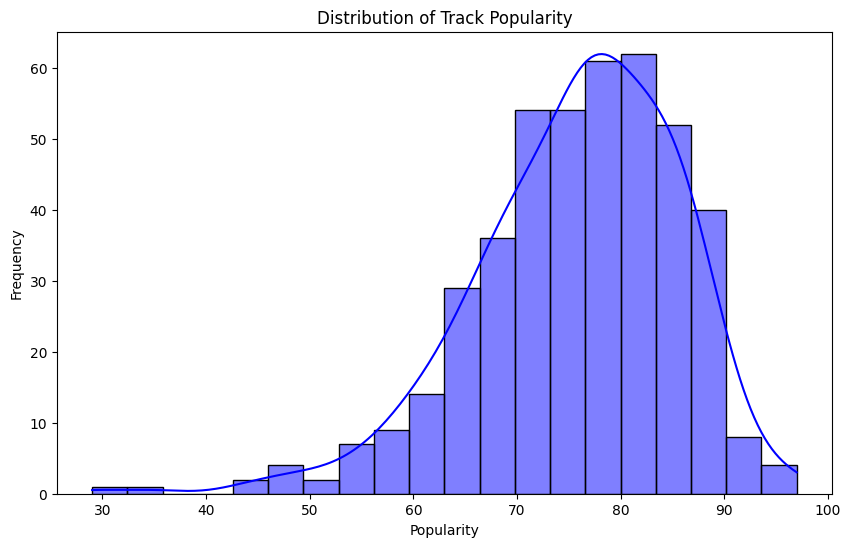

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

# Distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, color='blue', kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

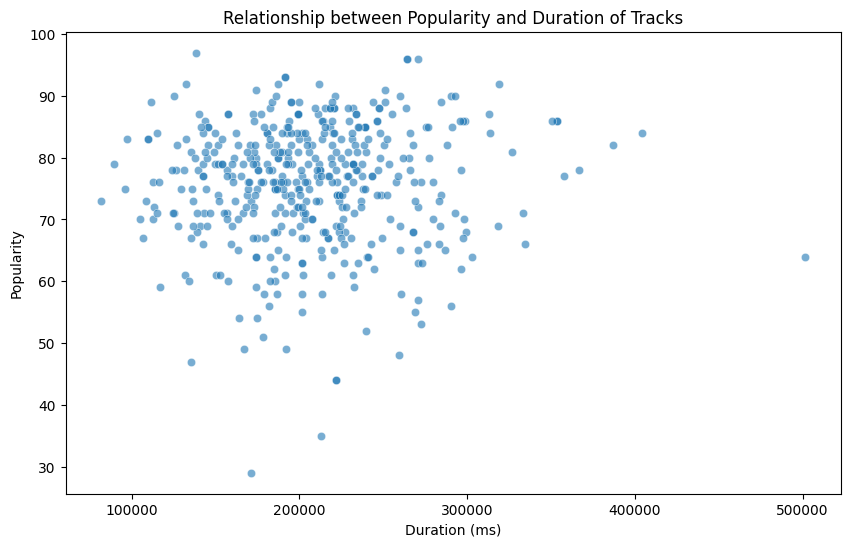

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

<ipython-input-17-f71ddb8f1518>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=artist_counts.index, palette='viridis')


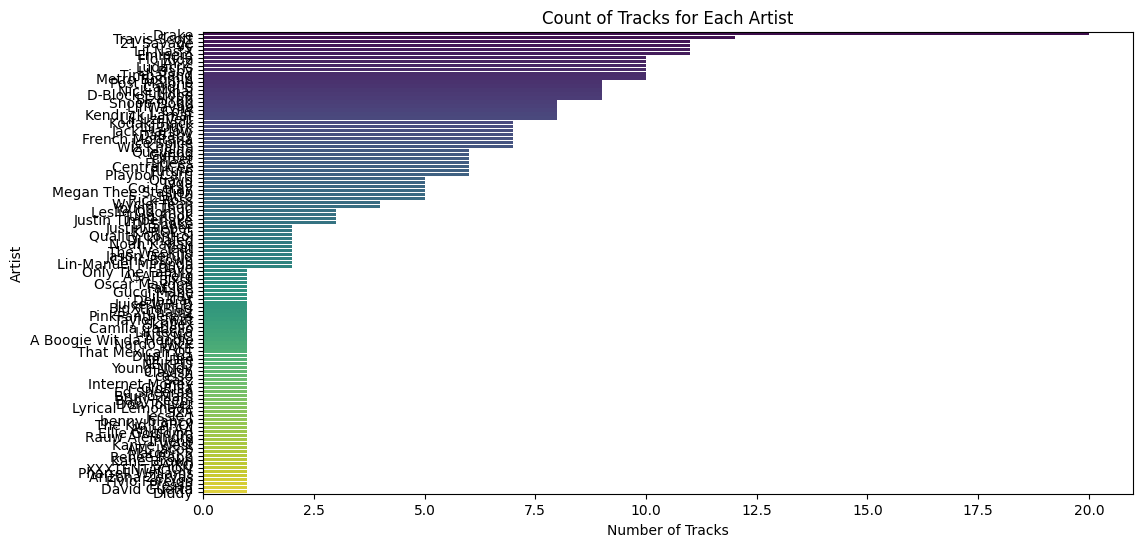

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

plt.figure(figsize=(12, 6))
artist_counts = df['Artist'].value_counts()
sns.countplot(data=df, y='Artist', order=artist_counts.index, palette='viridis')
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()



5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

top_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)
average_popularity = top_artists.reset_index().sort_values(by='Popularity', ascending=False)
print("\nTop 5 Most Popular Artists with their Average Popularity:")
print(average_popularity)


Top 5 Most Popular Artists with their Average Popularity:
         Artist  Popularity
0         cassö   92.000000
1        Trueno   89.000000
2  David Guetta   87.000000
3  Travis Scott   87.000000
4            ¥$   86.090909


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

top_artist_names = average_popularity['Artist'].tolist()
most_popular_tracks = df[df['Artist'].isin(top_artist_names)].sort_values(by=['Artist', 'Popularity'], ascending=[True, False])
top_tracks_by_artist = most_popular_tracks.groupby('Artist').head(1)[['Artist', 'Track Name']]
print("\nMost Popular Track for Each of the Top 5 Artists:")
print(top_tracks_by_artist)


Most Popular Track for Each of the Top 5 Artists:
           Artist                    Track Name
200  David Guetta            Baby Don't Hurt Me
30   Travis Scott    FE!N (feat. Playboi Carti)
241        Trueno  Mamichula - con Nicki Nicole
140         cassö                         Prada
260            ¥$                      CARNIVAL


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

<Figure size 1000x1000 with 0 Axes>

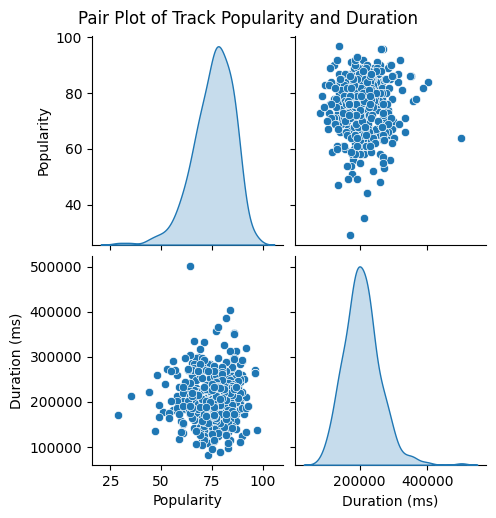

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

plt.figure(figsize=(10, 10))
sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde')
plt.suptitle('Pair Plot of Track Popularity and Duration', y=1.02)
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

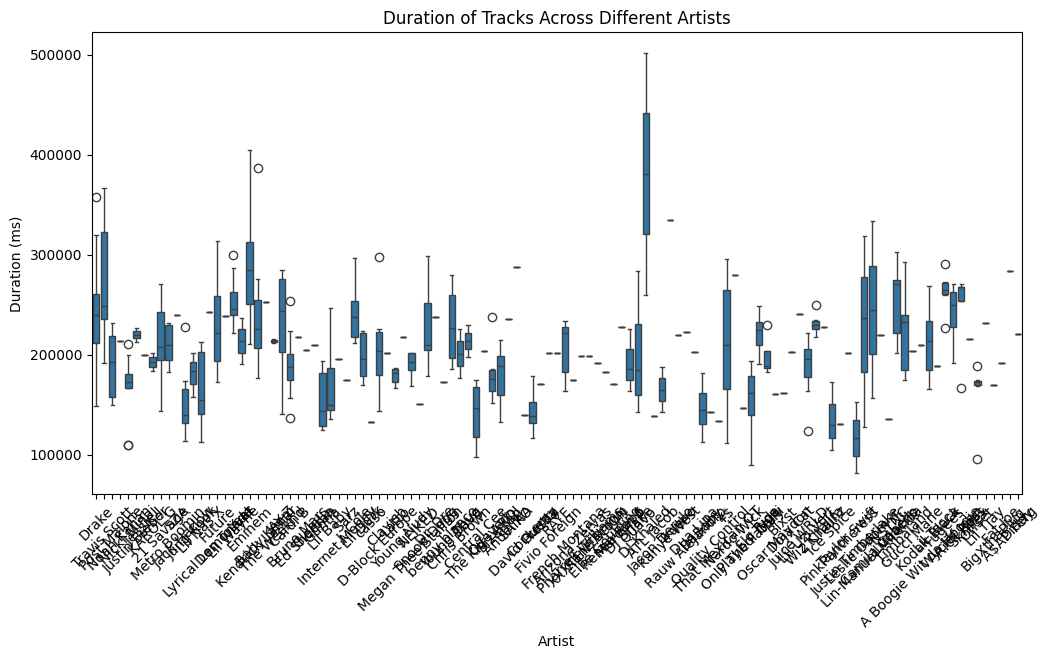

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')
plt.title('Duration of Tracks Across Different Artists')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

<ipython-input-23-ce865dbe024c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Artist', y='Popularity', inner='quartile', palette='pastel')


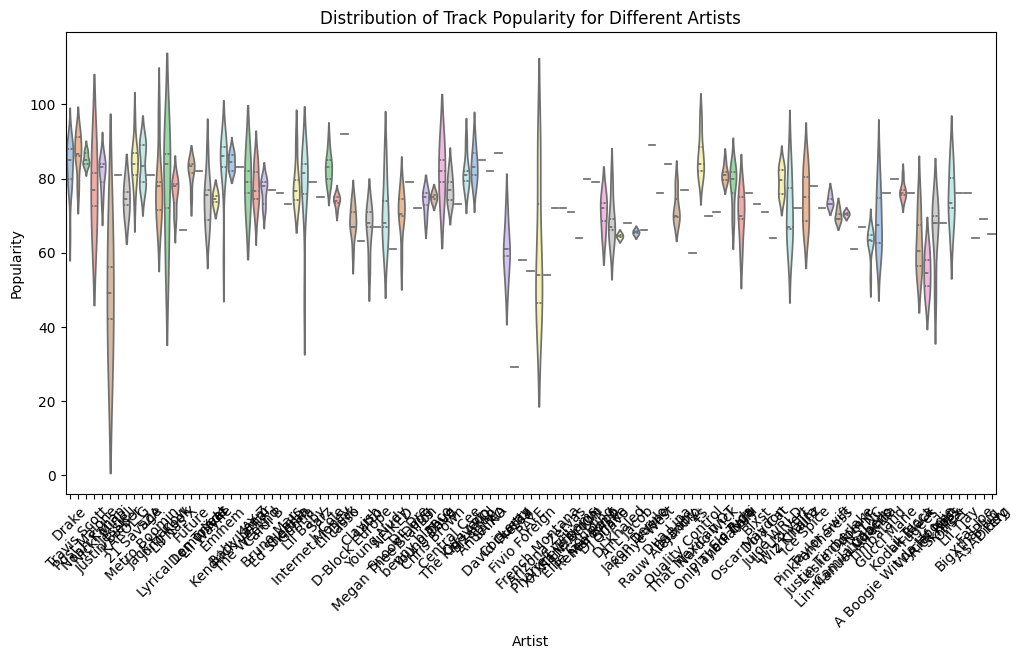

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify.csv')  # Replace with your file path

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Artist', y='Popularity', inner='quartile', palette='pastel')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()